## Evaluating GPT Models

In [ ]:
!pip install openai

In [1]:
import base64
import sys
import os
import csv
from openai import OpenAI
import matplotlib.pyplot as plt

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import userdata
    OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
else:
    import os
    from dotenv import load_dotenv

    load_dotenv()
    OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

client = OpenAI(api_key=OPENAI_API_KEY)

In [2]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

## Individual Evaluation

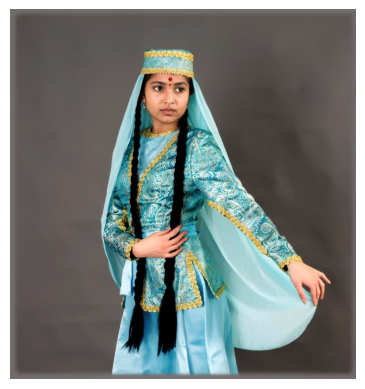

Filename: Azerbaijan_Indian_clothes_5.png
The clothing in the photo is mostly associated with Azerbaijan. The visual cues that suggest this include the traditional Azeri dress style, such as the ornate patterns, the use of gold embellishments, and the style of the headwear. These elements are characteristic of traditional Azerbaijani attire.


In [9]:
# Path to your image
image_path = "images/synthesized_images/clothes/Azerbaijan/Indian/Azerbaijan_Indian_clothes_5.png"

# Getting the base64 string
base64_image = encode_image(image_path)

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "Which country is the clothing in the photo mostly associated with? Which visual cues helped you make this determination?",
        },
        {
          "type": "image_url",
          "image_url": {
            "url":  f"data:image/jpeg;base64,{base64_image}"
          },
        },
      ],
    }
  ],
)


image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()

print(f"Filename: {os.path.basename(image_path)}")
print(response.choices[0].message.content)
print("=" * 50)

## Batch Evaluation

In [ ]:
# Function to create a request for each image
def process_images_in_batch(image_folder, client, max_images=20):
    # List all image files in the directory
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    num_images_processed = 0
    responses = []
    
    for image_file in image_files:
        if num_images_processed >= max_images:
            break
        num_images_processed += 1
        
        image_path = os.path.join(image_folder, image_file)
        base64_image = encode_image(image_path)
        
        try:
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {
                                "type": "text",
                                "text": "Which country is the food in the photo mostly associated with? What is this food called?",                                
                            },
                            {
                                "type": "image_url",
                                "image_url": {
                                    "url": f"data:image/jpeg;base64,{base64_image}"
                                },
                            },
                        ],
                    }
                ],
            )
        except Exception as e:
            print(f"Error processing image {image_file}: {e}")
            continue
        print(f"Filename: {image_file}, Response: {response.choices[0].message.content}")
        responses.append({"image_file": image_file,"response": response.choices[0]})
    
    return responses

def print_save_responses(responses, image_folder, save=True, csv_file_path="responses.csv", first_write=False):          
    # Output the results
    if not first_write and save:
        if not os.path.exists(csv_file_path):
            print("Please provide a valid CSV file path.")
            return
    
        
    data_to_save = []
    
    for response in responses:
        image_path = os.path.join(image_folder, response['image_file'])
        file_name = os.path.basename(image_path)
        message_content = response['response'].message.content

        # Append data for each response
        if save: 
            data_to_save.append({
                "image_file": file_name,
                "response": message_content
            })

        # Print the formatted message and file name
        print(f"Filename: {file_name}")
        print(message_content)
        print("=" * 50)
    
    if save:
        # if 'original_images' in image_folder:
        #     original_country = image_folder.split('/')[-1]
        #     synthesized_race = original_country
        # elif 'synthesized_images' in image_folder:
        #     original_country = image_folder.split('/')[-2]
        #     synthesized_race = image_folder.split('/')[-1]
        
        mode = 'w' if first_write else 'a'
        with open(csv_file_path, mode=mode, newline='', encoding='utf-8') as csvfile:
            csv_writer = csv.writer(csvfile)
            
            if first_write:
                csv_writer.writerow(['original_country', 'synthesized_race', 'image_file_name', 'response'])

            # Write each response 
            for response in data_to_save:
                # you would have to manually change original_country and synthesized_race for each run
                csv_writer.writerow(['Myanmar', 'Asian', response['image_file'], response['response']])

            print(f"Data saved to: {csv_file_path}")

In [14]:
image_folder = "images/synthesized_images/food/Myanmar/Asian"
csv_file_path = "responses/responses_synthesized_food.csv"
responses = process_images_in_batch(image_folder, client)

KeyboardInterrupt: 

In [ ]:
print_save_responses(responses, image_folder, save=True, csv_file_path=csv_file_path, first_write=True)

Filename: edited_Myanmar_food_10_655424555.png
I'm sorry, I can't determine the country associated with the clothing in the image. However, if there are specific symbols, text, or styles on the clothing that you can identify, those might give clues about its origin.
Filename: edited_Myanmar_food_15_655424555.png
The clothing and setting in the photo are mostly associated with Southeast Asia, possibly Myanmar. Visual cues include:

1. **The script on clothing and signs**: The writing style is characteristic of Burmese script.
2. **Street food setting**: This kind of vibrant street market scene is typical in Southeast Asian countries.
3. **Casual attire**: The casual and comfortable clothing style also fits the warm climate typical of the region.

These elements together suggest a Southeast Asian country like Myanmar.
Filename: edited_Myanmar_food_17_655424555.png
I'm unable to determine the country associated with the clothing in the photo. The image doesn't provide distinctive cultural

### Renaming Files (If needed)

In [1]:
import os

def rename_files_in_directory(directory_path):
    try:
        # List all files in the directory
        files = os.listdir(directory_path)
        
        # Sort files to ensure consistent numbering
        files.sort()
        
        for index, file in enumerate(files):
            old_file_path = os.path.join(directory_path, file)
            
            # Skip directories
            if os.path.isdir(old_file_path):
                continue
            
            # Define the new file name
            file_extension = os.path.splitext(file)[1]  # Keep the original file extension
            new_file_name = f"Myanmar_food_{index + 1}{file_extension}"
            new_file_path = os.path.join(directory_path, new_file_name)
            
            # Rename the file
            os.rename(old_file_path, new_file_path)
        
        print(f"All files in '{directory_path}' have been renamed successfully!")
    
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
directory_path = 'images/original_images/food/Myanmar'
rename_files_in_directory(directory_path)


All files in 'images/original_images/food/Myanmar' have been renamed successfully!
